In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
Coaches = pd.read_json('coaches/coaches.json')
Players = pd.read_json('players/players.json')
Events = pd.read_json('events/events_England.json')
Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_England.json')

# RQ1

In [2]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(Matches['teamsData'])):
    home_away[i] = {}
    for x in Matches['teamsData'][i]:
        if Matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [3]:
# add home_away dataframe to Matches and select the columns for problem 1:
Matches = Matches.join(home_away)
RQ1_df = Matches[['gameweek', 'winner', 'home', 'away']]
RQ1_df = RQ1_df.sort_values(by=['gameweek'])

In [4]:
# inizialize scores
game_weeks = set(RQ1_df['gameweek'])
teams_playing = set(RQ1_df['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(Matches['gameweek'])):
    if int(Matches['winner'][i]) != 0:
        scores[Matches['gameweek'][i]][str(Matches['winner'][i])] += 3
    else:
        scores[Matches['gameweek'][i]][str(Matches['home'][i])] += 1
        scores[Matches['gameweek'][i]][str(Matches['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [5]:
scores
#partia_scores

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
1627,3,6,7,7,8,8,9,10,10,10,...,20,20,20,20,21,24,25,28,31,31
1631,0,3,3,3,4,4,5,6,9,12,...,37,40,43,46,46,46,47,47,47,47
1619,1,4,5,5,8,8,8,9,12,13,...,28,28,31,31,31,31,32,35,36,36
1625,3,4,7,10,13,16,19,22,25,28,...,78,81,84,87,87,90,93,96,97,100
1628,0,0,0,0,0,0,0,3,3,4,...,27,27,30,30,31,34,35,38,41,44
1624,3,3,4,7,8,11,14,17,20,20,...,58,61,64,67,70,70,71,74,74,77
1659,0,0,0,0,3,3,4,4,7,7,...,33,33,36,37,38,38,38,38,41,44
1612,1,4,7,7,8,11,12,13,13,16,...,60,60,63,66,67,70,71,72,72,75
1633,0,0,0,3,4,4,7,8,8,9,...,30,30,31,34,35,36,36,36,39,42
1639,0,3,4,5,5,5,8,8,8,11,...,27,27,27,27,27,28,29,30,30,33


In [ ]:
Teams[['wyId', 'officialName']]

In [3]:
Teams

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


# RQ3

In [6]:
import matplotlib.pyplot as plt
import datetime

# Add column 'Nation' on Teams
Nation = pd.DataFrame([x['name'] for x in Teams['area']],columns=['Nation'])
Teams = pd.merge(Teams, Nation, left_index=True, right_index=True)
Teams_England = Teams[((Teams['Nation'] == 'England') | (Teams['Nation'] == 'Wales')) & (Teams['type'] == 'club')]

In [7]:
# Add column 'Age' on Coaches
current_date = datetime.datetime.now().date()
Age = []
for x in Coaches['birthDate']:
    try:
        Age.append(int((current_date - datetime.date.fromisoformat(x)).days // 365))
    except:
        Age.append(0)
Age = pd.DataFrame(Age, columns=['Age'], dtype=int)
Coaches = pd.merge(Coaches, Age, left_index=True, right_index=True)

In [8]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
for x in (Matches[Matches['gameweek']==1]['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

Coaches_Teams_England = pd.merge(teams_coaches, 
                                 Coaches[['currentTeamId', 
                                          'birthDate',
                                          'Age','wyId']], left_on='Coach', right_on='wyId')
Coaches_Teams_England = pd.merge(Coaches_Teams_England, Teams_England[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

In [9]:
# Print the 10 teams with the youngest coaches
Teams_young_Coaches = Coaches_Teams_England.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(Teams_young_Coaches['officialName'])))

Chelsea FC
Crystal Palace FC
Manchester City FC
Burnley FC
Southampton FC
Huddersfield Town FC
Swansea City AFC
Tottenham Hotspur FC
Watford FC
AFC Bournemouth


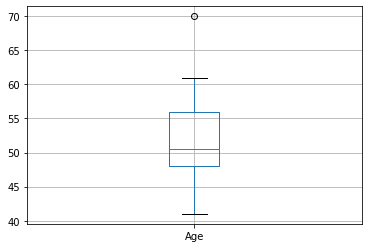

In [17]:
#Print Age boxplot
Coaches_Teams_England.boxplot(column="Age")
plt.show()

In [18]:
Coaches_Teams_England 

,Team,Coach,currentTeamId,birthDate,Age,wyId_x,wyId_y,officialName
0,1633,269869,0,1968-09-11,51,269869,1633,West Ham United FC
1,1611,3295,0,1963-01-26,56,3295,1611,Manchester United FC
2,1613,210700,1613,1960-04-16,59,210700,1613,Newcastle United FC
3,1624,292863,1624,1972-03-02,47,292863,1624,Tottenham Hotspur FC
4,1651,8093,1651,1958-12-11,60,8093,1651,Brighton & Hove Albion FC
5,1625,267136,1625,1971-01-18,48,267136,1625,Manchester City FC
6,1646,8880,1646,1971-06-28,48,8880,1646,Burnley FC
7,1610,272869,0,1969-07-31,50,272869,1610,Chelsea FC
8,1628,268775,58165,1970-05-15,49,268775,1628,Crystal Palace FC
9,1673,18572,0,1971-10-19,48,18572,1673,Huddersfield Town FC


## RQ4 

In [35]:
# Generate England_Players DataFrame
England_Teams_ID_list = list(Coaches_Teams_England['Team'])
player_list =[]
for x in England_Teams_ID_list:
    player_list.append(Players[Players['currentTeamId'] ==x ])

England_Players = pd.concat(player_list)

In [36]:
# Generate England_Events DataFrame
England_Players_ID_list = list(England_Players['wyId'])
event_list =[]
for x in England_Players_ID_list:
    event_list.append(Events[Events['playerId'] == x ])

England_Events = pd.concat(event_list)

In [42]:
England_Events_Pass = England_Events[England_Events['eventName']=='Pass']

In [68]:
count_total_pass = {}
count_accurate_pass = {}
for x in England_Players_ID_list:
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})

In [69]:
for x in England_Events_Pass['playerId']:
    count_total_pass[x] += 1

In [70]:
count_total_pass

{7847: 699,
 7941: 340,
 26518: 0,
 14703: 689,
 21100: 1002,
 20620: 725,
 8313: 1203,
 7970: 183,
 8561: 1245,
 8553: 647,
 8582: 1350,
 3582: 290,
 7873: 783,
 8677: 392,
 41174: 1178,
 26499: 749,
 379205: 0,
 379209: 549,
 397178: 586,
 70122: 2456,
 71703: 729,
 7905: 618,
 7910: 621,
 7918: 1057,
 7934: 917,
 7936: 1661,
 7939: 1360,
 8249: 369,
 40335: 0,
 20606: 12,
 21095: 196,
 7938: 1643,
 3361: 1418,
 8935: 51,
 7906: 1215,
 101652: 348,
 3413: 1024,
 7922: 1071,
 8135: 487,
 134513: 749,
 256998: 416,
 397174: 337,
 50102: 0,
 94764: 0,
 104851: 195,
 7974: 283,
 8004: 668,
 61962: 794,
 7967: 1267,
 8620: 757,
 3577: 673,
 21164: 1167,
 9227: 1057,
 3327: 466,
 3523: 1003,
 8826: 179,
 70215: 476,
 8833: 1117,
 7978: 597,
 134294: 496,
 3436: 541,
 230883: 675,
 240270: 0,
 252365: 1055,
 254898: 357,
 293686: 306,
 36: 898,
 48: 2370,
 54: 2196,
 8292: 392,
 8717: 594,
 8945: 1311,
 11152: 1365,
 210044: 2147,
 13484: 1184,
 14911: 938,
 25381: 815,
 136441: 1349,
 4076